### Bocioroaga George
### Grupa 505

In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from scipy.stats.stats import pearsonr
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [77]:
#import data
data=pd.read_csv('C:/Users/georg/Downloads/edstats/EdStatsData.csv')

In [78]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [79]:
data["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


### Filtering to contain only the data about the Europe and Central Asia Region

In [80]:
dataECS = data[data["Country Code"].isin(["ECS","WLD"])]

In [81]:
dataECS

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
14660,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14661,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14662,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14663,Europe & Central Asia,ECS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14664,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,93.335213,93.054619,93.135818,93.235611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91620,World,WLD,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91621,World,WLD,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91622,World,WLD,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91623,World,WLD,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cols = dataECS.columns[dataECS.columns.slice_indexer('1995','2015')]

In [83]:
cols

Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')

In [84]:
#drop nulls
dataECS = dataECS.dropna(subset=cols,how='all')

In [85]:
dataECS = dataECS.drop(dataECS.loc[:, '2015':'2100'].columns, axis = 1)

In [86]:
dataECS = dataECS.drop(dataECS.loc[:, '1970':'1995'].columns, axis = 1)

In [87]:
dataECS = dataECS.drop('Unnamed: 69',axis=1)

In [88]:
dataECS.set_index('Indicator Code',inplace=True)

In [89]:
dataECS

,Country Name,Country Code,Indicator Name,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Indicator Code,,,,,,,,,,,,,,,,,,,,,
SE.PRM.TENR,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, both sex...",9.484034e+01,9.503590e+01,9.585266e+01,9.619176e+01,9.664809e+01,9.747771e+01,9.797246e+01,...,9.673683e+01,9.683275e+01,9.686298e+01,9.713011e+01,9.698089e+01,9.727472e+01,9.732918e+01,9.724965e+01,9.730625e+01,9.702209e+01
SE.PRM.TENR.FE,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, female (%)",9.426855e+01,9.443882e+01,9.526782e+01,9.564045e+01,9.625444e+01,9.706914e+01,9.757091e+01,...,9.647266e+01,9.660628e+01,9.673335e+01,9.697417e+01,9.690704e+01,9.723278e+01,9.730631e+01,9.725187e+01,9.729101e+01,9.703249e+01
UIS.NERA.1.GPI,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, gender p...",9.882700e-01,9.877800e-01,9.881300e-01,9.888500e-01,9.920700e-01,9.918400e-01,9.920200e-01,...,9.946800e-01,9.954400e-01,9.973900e-01,9.968700e-01,9.985200e-01,9.991600e-01,9.995400e-01,1.000040e+00,9.996900e-01,1.000210e+00
SE.PRM.TENR.MA,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, male (%)",9.538775e+01,9.560714e+01,9.641181e+01,9.671846e+01,9.702402e+01,9.786746e+01,9.835539e+01,...,9.698852e+01,9.704849e+01,9.698639e+01,9.727853e+01,9.705114e+01,9.731461e+01,9.735090e+01,9.724755e+01,9.732072e+01,9.701221e+01
UIS.NIRA.1,Europe & Central Asia,ECS,Adjusted net intake rate to Grade 1 of primary...,9.042441e+01,9.043940e+01,9.101959e+01,9.122364e+01,9.155686e+01,9.220403e+01,9.227402e+01,...,9.176620e+01,9.193613e+01,9.268372e+01,9.203227e+01,9.144974e+01,9.263978e+01,9.318523e+01,9.345554e+01,9.342006e+01,8.944010e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UIS.LP.AG15T24.F,World,WLD,"Youth illiterate population, 15-24 years, fema...",8.602780e+07,8.602780e+07,8.602780e+07,8.602780e+07,8.602780e+07,8.602780e+07,8.602780e+07,...,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07,6.756973e+07
SE.ADT.1524.LT.ZS,World,WLD,"Youth literacy rate, population 15-24 years, b...",8.726631e+01,8.726631e+01,8.726631e+01,8.726631e+01,8.726907e+01,8.726631e+01,8.726631e+01,...,9.061835e+01,9.061835e+01,9.061835e+01,9.061835e+01,9.061835e+01,9.062017e+01,9.061835e+01,9.061835e+01,9.061835e+01,9.061835e+01
SE.ADT.1524.LT.FE.ZS,World,WLD,"Youth literacy rate, population 15-24 years, f...",8.398630e+01,8.398630e+01,8.398630e+01,8.398630e+01,8.399000e+01,8.398630e+01,8.398630e+01,...,8.861294e+01,8.861294e+01,8.861294e+01,8.861294e+01,8.861294e+01,8.861526e+01,8.861294e+01,8.861294e+01,8.861294e+01,8.861294e+01


## Filtering and cleaning data for Country

In [90]:
countryData = pd.read_csv('C:/Users/georg/Downloads/edstats/EdStatsCountry.csv')

In [91]:
countryDataE = countryData[countryData['Region'] == 'Europe & Central Asia']
countries = countryDataE['Table Name'].to_list()
dataCountries = data[data["Country Name"].isin(countries)]

In [92]:
dataCountries = dataCountries.dropna(subset= cols,how='all')
dataCountries = dataCountries.drop('Unnamed: 69',axis=1)
dataCountries = dataCountries.drop(dataCountries.loc[:, '1970':'1995'].columns, axis = 1)
dataCountries = dataCountries.drop(dataCountries.loc[:, '2015':'2100'].columns, axis = 1)

In [93]:
dataCountries["region"] = "Europe and Central Asia"

In [94]:
dataCountries

,Country Name,Country Code,Indicator Name,Indicator Code,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,region
95290,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,84.558281,85.306610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.666588,88.778252,Europe and Central Asia
95291,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,83.848213,84.769829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.354607,88.133423,Europe and Central Asia
95292,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.983600,0.987710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993110,0.986010,Europe and Central Asia
95293,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,85.246353,85.824432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.960289,89.383621,Europe and Central Asia
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,97.314247,95.889877,94.327347,...,NaN,NaN,90.267288,89.393333,91.033867,93.225662,96.137093,95.912598,95.920891,Europe and Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857605,Uzbekistan,UZB,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,3632.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Europe and Central Asia
857606,Uzbekistan,UZB,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,99.874350,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,Europe and Central Asia
857607,Uzbekistan,UZB,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,99.894480,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,Europe and Central Asia
857608,Uzbekistan,UZB,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,1.000410,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,Europe and Central Asia


In [95]:
dataCountries.set_index('Indicator Code',inplace=True)

# Visualization

### Prepare data for GDP and GNI

In [96]:
ecsGDP = dataECS[dataECS['Indicator Name']=='GDP per capita (current US$)']
ecsGNI = dataECS[dataECS['Indicator Name']=='GNI per capita, Atlas method (current US$)']
ecsGDP

,Country Name,Country Code,Indicator Name,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Indicator Code,,,,,,,,,,,,,,,,,,,,,
NY.GDP.PCAP.CD,Europe & Central Asia,ECS,GDP per capita (current US$),12910.501725,12229.254095,12515.094849,12355.925681,11626.213353,11721.093286,12799.364279,...,19191.592037,20709.685651,24108.847782,26352.539224,23084.226956,23536.905927,26015.889000,24970.975153,25976.554634,26192.934765
NY.GDP.PCAP.CD,World,WLD,GDP per capita (current US$),5447.096687,5350.341673,5260.622990,5384.311328,5486.458835,5381.816119,5518.071250,...,7277.695746,7784.171032,8660.974035,9382.642832,8787.273503,9516.346699,10449.379182,10551.742820,10718.690887,10874.863245


In [97]:
ecsGDP = ecsGDP.drop(['Country Name','Country Code','Indicator Name'], axis = 1)

Text(0, 0.5, 'US dollars')

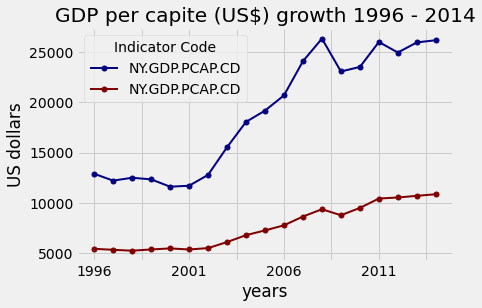

In [98]:
ecsGDP = ecsGDP.T
plt.style.use('fivethirtyeight')
gdpGrowth = ecsGDP.plot(lw=2, colormap='jet', marker='.', markersize=10, title='GDP per capite (US$) growth 1996 - 2014')
gdpGrowth.set_xlabel("years")
gdpGrowth.set_ylabel("US dollars")
#Blue - Europe and Central Asia
#Red - World

In [99]:
countriesGDP = dataCountries[dataCountries['Indicator Name']=='GDP per capita (current US$)']
countriesGDP.set_index('Country Code',inplace=True)
countriesGDP = countriesGDP.drop(['Country Name','Indicator Name'], axis = 1)
countriesGDP = countriesGDP.T
countriesGDP2014 = countriesGDP.loc['2014']

### GDP of all countries found 

Text(0, 0.5, 'US dollars')

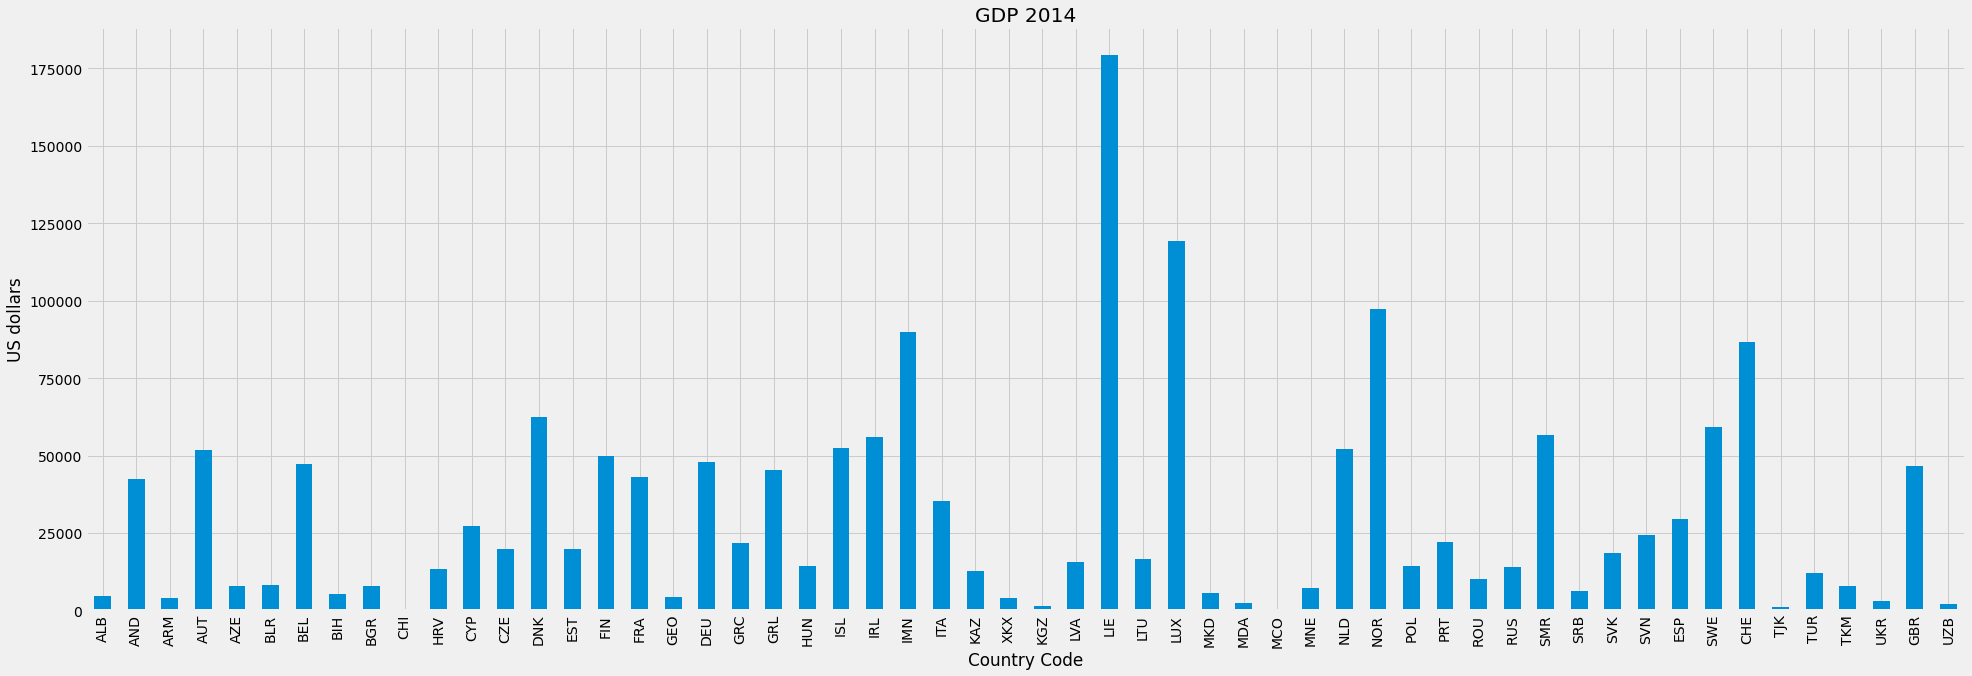

In [100]:
countriesGDP2014 = countriesGDP2014.T
gdpCGrowth = countriesGDP2014.plot(kind="bar",figsize=(30,10), title='GDP 2014')
gdpCGrowth.set_xlabel("Country Code")
gdpCGrowth.set_ylabel("US dollars")

In [101]:
countriesGDP2014top = countriesGDP2014.astype(str).astype(float).nlargest(5)
countriesGDP2014top

Country Code
LIE    179308.075616
LUX    119225.380023
NOR     97199.919096
IMN     89941.644285
CHE     86605.563376
Name: 2014, dtype: float64

Text(0, 0.5, 'US dollars')

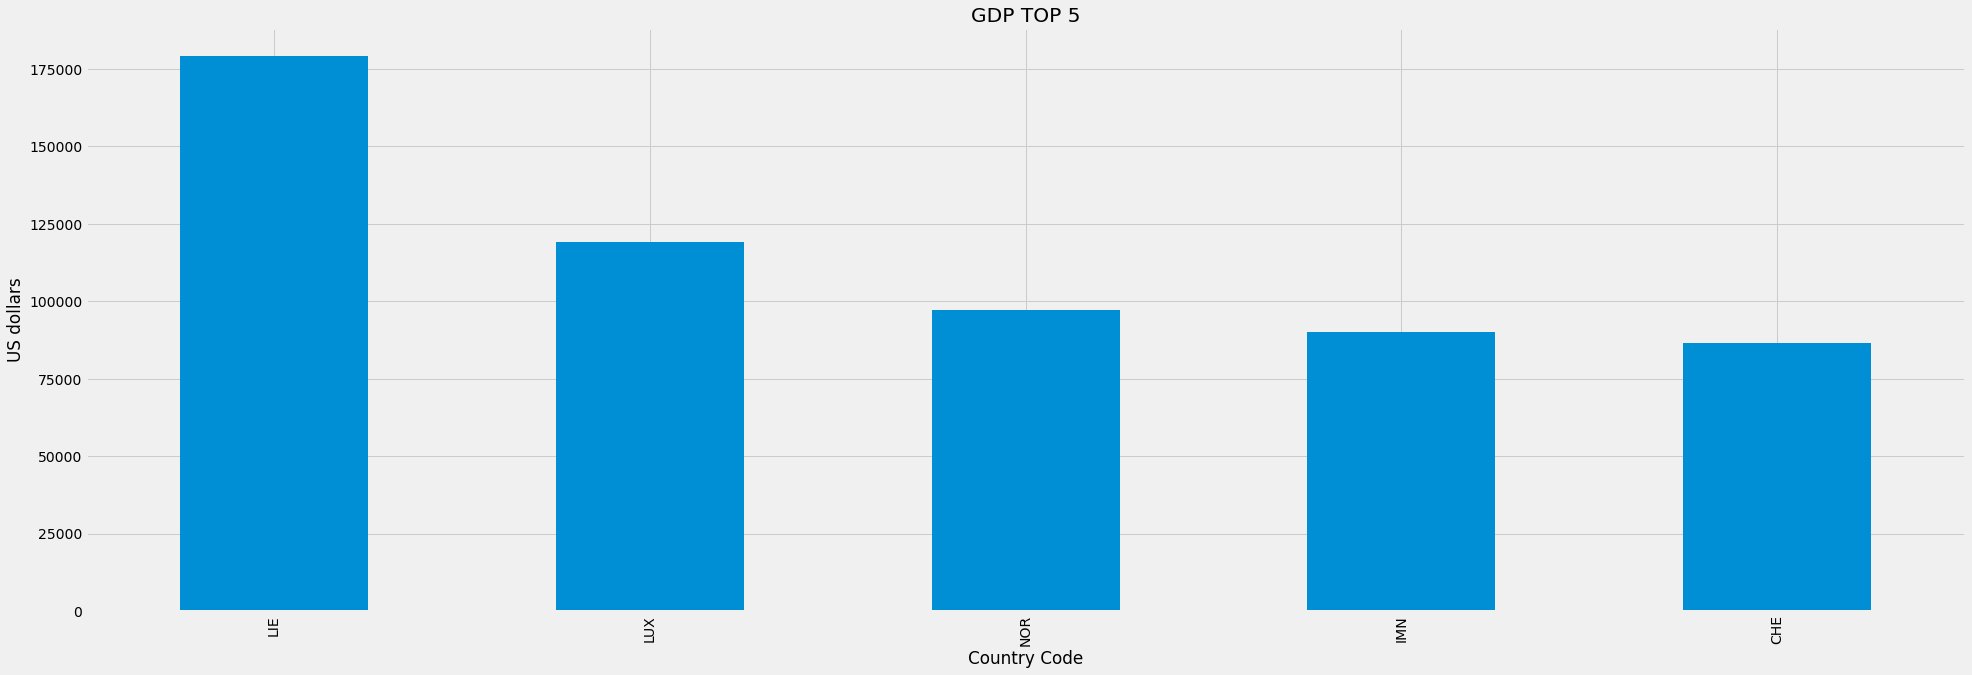

In [102]:
countriesGDP2014top = countriesGDP2014top.T
gdpCGrowth = countriesGDP2014top.plot(kind="bar",figsize=(30,10), title='GDP TOP 5')
gdpCGrowth.set_xlabel("Country Code")
gdpCGrowth.set_ylabel("US dollars")

In [103]:
countriesGDP2014bottom = countriesGDP2014.astype(str).astype(float).nsmallest(5)
countriesGDP2014bottom

Country Code
TJK    1104.459019
KGZ    1279.769783
UZB    2050.448414
MDA    2244.763762
UKR    3104.658296
Name: 2014, dtype: float64

Text(0, 0.5, 'US dollars')

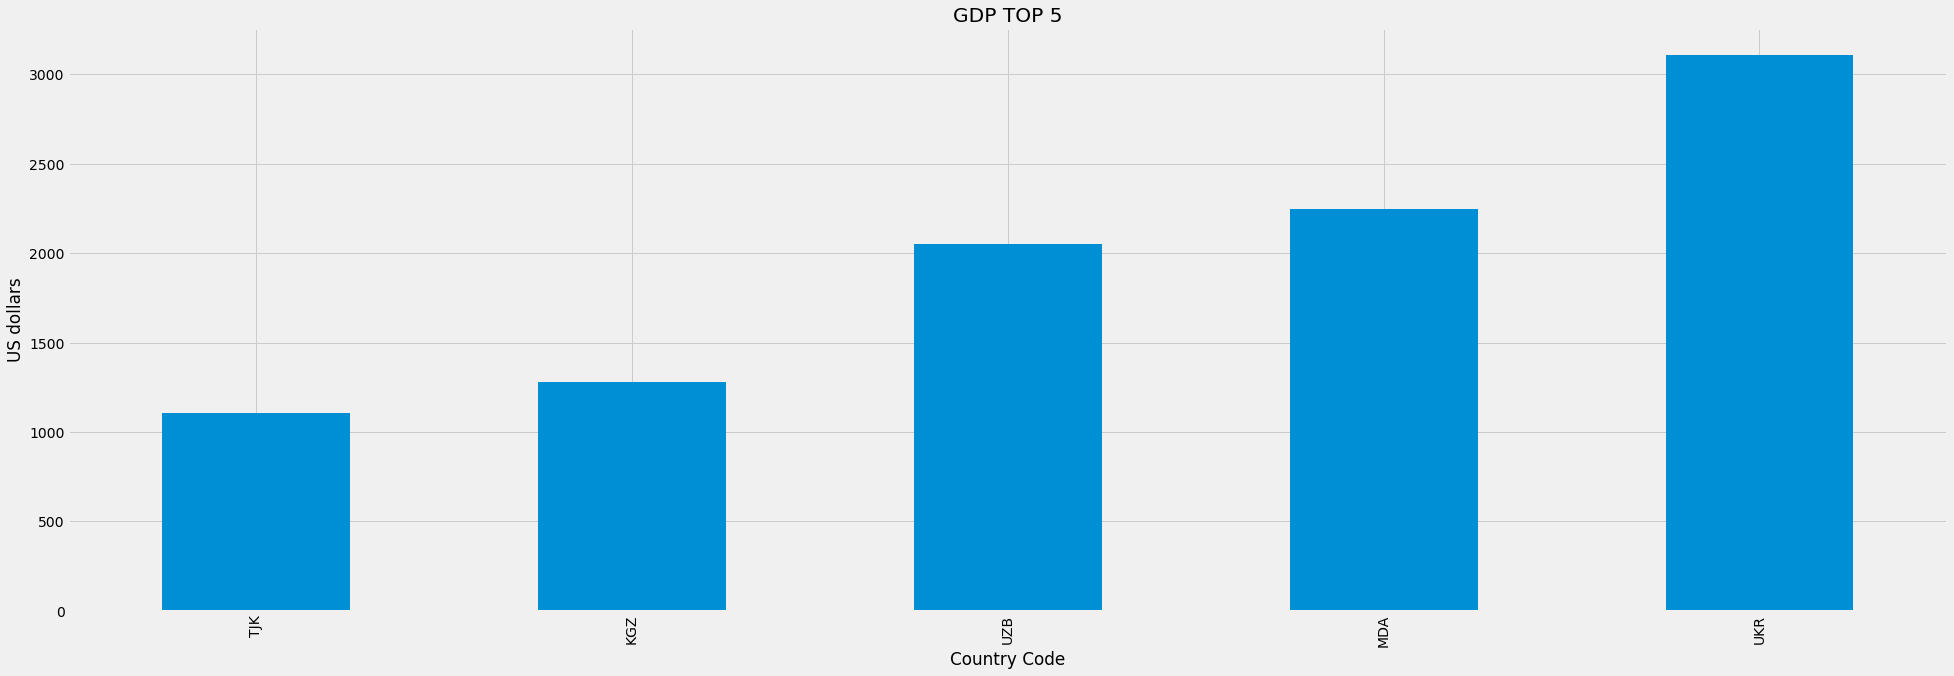

In [104]:
countriesGDP2014bottom = countriesGDP2014bottom.T
gdpCGrowth = countriesGDP2014bottom.plot(kind="bar",figsize=(30,10), title='GDP TOP 5')
gdpCGrowth.set_xlabel("Country Code")
gdpCGrowth.set_ylabel("US dollars")

In [105]:
ecsGNI

,Country Name,Country Code,Indicator Name,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Indicator Code,,,,,,,,,,,,,,,,,,,,,
NY.GNP.PCAP.CD,Europe & Central Asia,ECS,"GNI per capita, Atlas method (current US$)",12686.302185,12927.705548,12537.309727,12409.469474,12501.510503,12086.254415,12018.368816,...,19210.646358,20813.907101,22565.301143,24535.092021,24248.800790,24465.162052,24919.629832,25201.808107,25886.446275,25883.591689
NY.GNP.PCAP.CD,World,WLD,"GNI per capita, Atlas method (current US$)",5481.773065,5526.804556,5292.340890,5296.011004,5478.597777,5452.226901,5409.276843,...,7341.832593,7826.917819,8341.864198,8933.740832,8958.453302,9387.199313,9872.324209,10456.653421,10826.358497,10925.852557


In [106]:
ecsGNI = ecsGNI.drop(['Country Name','Country Code','Indicator Name'], axis = 1)

In [107]:
ecsGNI = ecsGNI.T

Text(0, 0.5, 'US dollars')

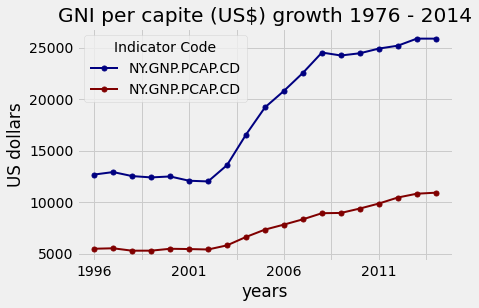

In [108]:
gniGrowth = ecsGNI.plot(lw=2, colormap='jet', marker='.', markersize=10, title='GNI per capite (US$) growth 1976 - 2014')
gniGrowth.set_xlabel("years")
gniGrowth.set_ylabel("US dollars")

In [109]:
countriesGNI = dataCountries[dataCountries['Indicator Name']=='GNI per capita, Atlas method (current US$)']

In [110]:
countriesGNI.set_index('Country Code',inplace=True)
countriesGNI = countriesGNI.drop(['Country Name','Indicator Name'], axis = 1)
countriesGNI = countriesGNI.T
countriesGNI2014 = countriesGNI.loc['2014']

Text(0, 0.5, 'US dollars')

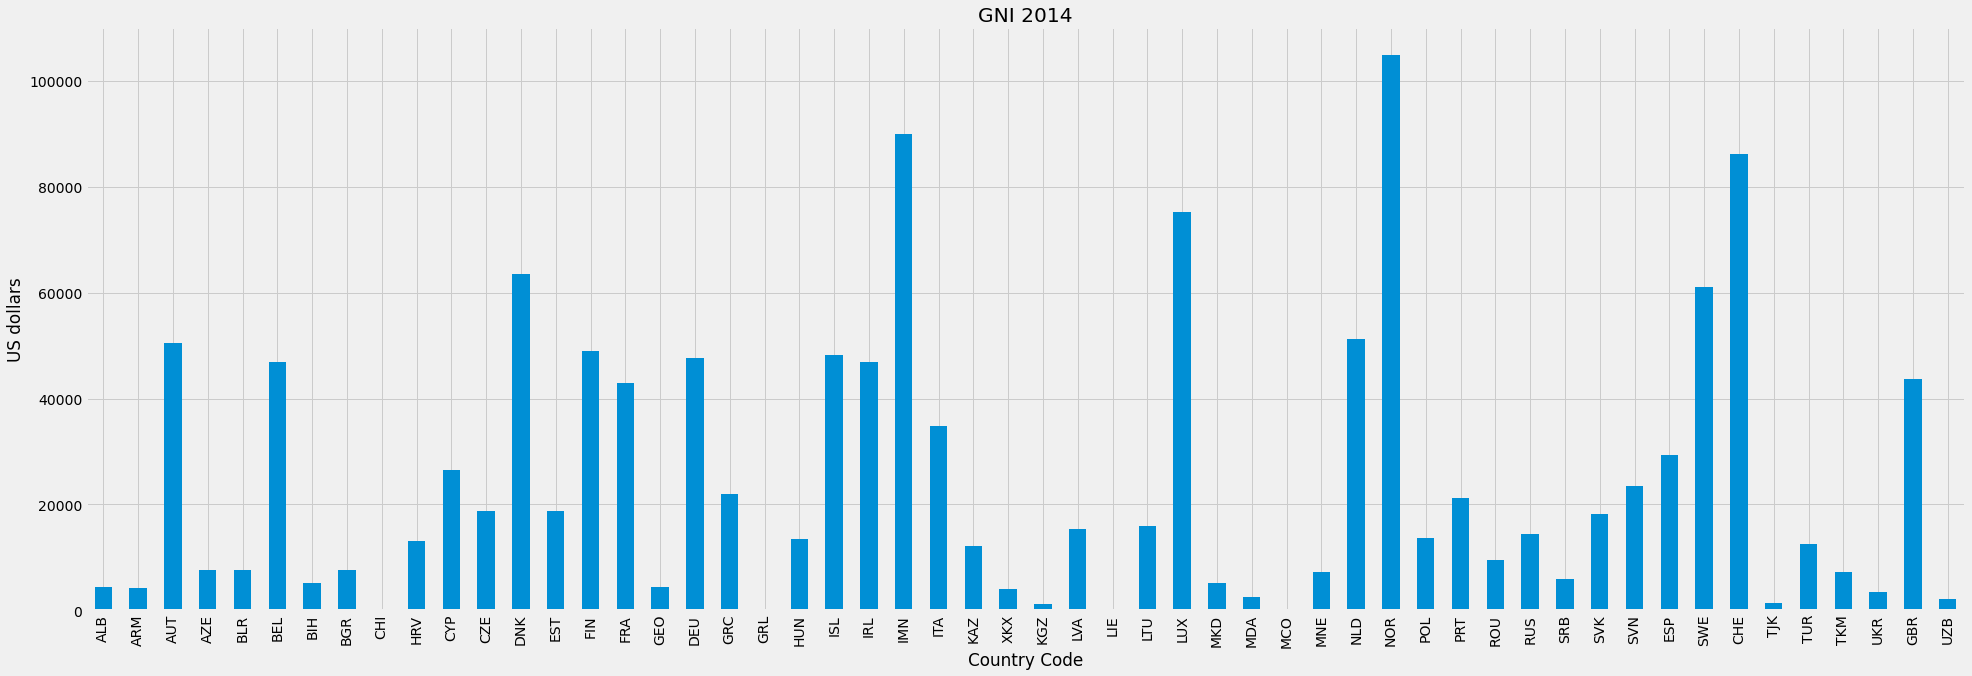

In [111]:
countriesGNI2014 = countriesGNI2014.T
gdpCGrowth = countriesGNI2014.plot(kind="bar",figsize=(30,10), title='GNI 2014')
gdpCGrowth.set_xlabel("Country Code")
gdpCGrowth.set_ylabel("US dollars")

### Bubble GDP

In [112]:
dataC = dataCountries.drop(['Indicator Name'], axis = 1)

In [113]:
gdp_data = dataC[dataC.index.isin(['NY.GDP.PCAP.CD'])]
melted_gdp = pd.melt(gdp_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "GDP")
grouped_gdp = melted_gdp.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

it_data = dataC[dataC.index.isin(['IT.NET.USER.P2'])]
melted_it = pd.melt(it_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Internet")
grouped_it = melted_it.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

pop_data = dataC[dataC.index.isin(['SP.POP.TOTL'])]
melted_pop = pd.melt(pop_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Population")
grouped_pop = melted_pop.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

lfp_data = dataC[dataC.index.isin(['UIS.SLE.56'])]
melted_lfp = pd.melt(lfp_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Life Expectency")
grouped_lfp = melted_lfp.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

slf_data = dataC[dataC.index.isin(['SE.SCH.LIFE'])]
melted_slf = pd.melt(slf_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "School Life")
grouped_slf = melted_slf.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

enr_data = dataC[dataC.index.isin(['SE.TOT.ENRR'])]
melted_enr = pd.melt(enr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Enrolment")
grouped_enr = melted_enr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

penr_data = dataC[dataC.index.isin(['SE.PRM.ENRR'])]
melted_penr = pd.melt(penr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Primary Enrolment")
grouped_penr = melted_penr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

senr_data = dataC[dataC.index.isin(['SE.SEC.ENRR'])]
melted_senr = pd.melt(senr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Secondary Enrolment")
grouped_senr = melted_senr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

tenr_data = dataC[dataC.index.isin(['SE.TER.ENRR'])]
melted_tenr = pd.melt(tenr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Tertiary Enrolment")
grouped_tenr = melted_tenr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)



In [114]:
for col in grouped_senr:
    print(grouped_senr[col].unique())

['ALB' 'ARM' 'AUT' 'AZE' 'BEL' 'BGR' 'BLR' 'CHE' 'CYP' 'CZE' 'DEU' 'DNK'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GEO' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ITA'
 'KAZ' 'KGZ' 'LIE' 'LTU' 'LUX' 'LVA' 'MDA' 'MKD' 'MNE' 'NLD' 'NOR' 'POL'
 'PRT' 'ROU' 'RUS' 'SMR' 'SRB' 'SVK' 'SVN' 'SWE' 'TJK' 'TKM' 'TUR' 'UKR'
 'UZB']
['Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belgium' 'Bulgaria' 'Belarus'
 'Switzerland' 'Cyprus' 'Czech Republic' 'Germany' 'Denmark' 'Spain'
 'Estonia' 'Finland' 'France' 'United Kingdom' 'Georgia' 'Greece'
 'Croatia' 'Hungary' 'Ireland' 'Iceland' 'Italy' 'Kazakhstan'
 'Kyrgyz Republic' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Latvia'
 'Moldova' 'Macedonia, FYR' 'Montenegro' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'San Marino' 'Serbia'
 'Slovak Republic' 'Slovenia' 'Sweden' 'Tajikistan' 'Turkmenistan'
 'Turkey' 'Ukraine' 'Uzbekistan']
['Europe and Central Asia']
['1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008'

In [115]:
temp = pd.merge(grouped_gdp, grouped_it, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_pop, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_lfp, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_slf, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_enr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_penr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_senr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_tenr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')

In [116]:
cols= ['Country Name','Country Code', 'region','Year', 'GDP', 'Internet', 'Population','Life Expectency','School Life','Gross Enrolment','Gross Primary Enrolment','Gross Secondary Enrolment','Gross Tertiary Enrolment']
temp = temp[cols]

In [117]:
data = temp

In [118]:
fig = px.scatter(data, x="GDP", y="Internet", animation_frame="Year", animation_group="Country Name",
           size="Population", color="Country Name", hover_name="Country Name",
           log_x=True, size_max=55, range_x=[100,10000000], range_y=[-10,100])
fig.show()

### Average School Life from Primary to Tertiary as of 2014

In [119]:
df = data.loc[data['Year'] == '2014']
fig = px.treemap(df, path=['region', 'Country Name'], values='Population',
                  color='School Life', hover_data=['Country Name'])
fig.show()

### Internet Users Growth

In [120]:
fig = px.bar(data, x="Country Code", y="Internet", color="Country Name",
  animation_frame="Year", animation_group="Country Name", range_y=[0,100])
fig.show()

In [121]:
# Choose year to see data
data = data.loc[data['Year'] == '2014']

In [122]:
cols_dd = ["Population", "GDP", "Internet","Life Expectency","School Life"]
# we need to add this to select which trace 
# is going to be visible
visible = np.array(cols_dd)

# define traces and buttons at once
traces = []
buttons = []
for value in cols_dd:
    traces.append(go.Choropleth(
       locations=data['Country Code'], # Spatial coordinates
        z=data[value].astype(float), # Data to be color-coded
        colorbar_title=value,
        visible= True if value==cols_dd[0] else False))

    buttons.append(dict(label=value,
                        method="update",
                        args=[{"visible":list(visible==value)},
                              {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0,
                "buttons":buttons,
               }]

# Show figure
fig = go.Figure(data=traces,
                layout=dict(updatemenus=updatemenus))
# This is in order to get the first title displayed correctly
first_title = cols_dd[0]
fig.update_layout(title=f"<b>{first_title}</b>",title_x=0.5 )
fig.show()

### Enrolment of students

In [123]:
ecsOfficialAgePop = dataCountries[dataCountries.index.isin(['SP.PRM.TOTL.IN','SP.SEC.TOTL.IN','SP.TER.TOTL.IN'])]
officialAgept = pd.pivot_table(ecsOfficialAgePop, index='Country Name', columns='Indicator Name', values=['2014'], dropna=True)

In [124]:
officialAgept

2014  \
Indicator Name     Population of the official age for primary education, both sexes (number)   
Country Name                                                                                   
Albania                                                      173994.0                          
Armenia                                                           NaN                          
Austria                                                      320049.0                          
Azerbaijan                                                   488128.0                          
Belarus                                                      372635.0                          
Belgium                                                      737755.0                          
Bulgaria                                                     261246.0                          
Croatia                                                      162649.0                          
Cyprus                                                        53583.0                          
Czech Republic                                               516474.0                          
Denmark                                                      461339.0                          
Estonia                                                       77787.0                          
Finland                                                      346812.0                          
France                                                      3975529.0                          
Georgia                                                      244159.0                          
Germany                                                     2770311.0                          
Greece                                                       644082.0                          
Hungary                                                      387167.0                          
Iceland                                                       30032.0                          
Ireland                                                      525347.0                          
Italy                                                       2819229.0                          
Kazakhstan                                                  1007898.0                          
Kyrgyz Republic                                              403673.0                          
Latvia                                                       114157.0                          
Liechtenstein                                                  1879.0                          
Lithuania                                                    105519.0                          
Luxembourg                                                    36482.0                          
Macedonia, FYR                                               119739.0                          
Moldova                                                      148736.0                          
Montenegro                                                    39822.0                          
Netherlands                                                 1170898.0                          
Norway                                                       425310.0                          
Poland                                                      2140422.0                          
Portugal                                                     621167.0                          
Romania                                                     1051077.0                          
Russian Federation                                          5808937.0                          
San Marino                                                     1665.0                          
Serbia                                                       281569.0                          
Slovak Republic                                              211690.0                          
Slovenia                                                

In [125]:
dataC = dataCountries.drop(['Indicator Name'], axis = 1)

In [126]:
penr_data = dataC[dataC.index.isin(['SE.PRM.TCHR'])]
melted_penr = pd.melt(penr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Primary Teachers")
grouped_pt = melted_penr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

senr_data = dataC[dataC.index.isin(['SE.SEC.TCHR'])]
melted_senr = pd.melt(senr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Secondary Teachers")
grouped_st = melted_senr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

tenr_data = dataC[dataC.index.isin(['SE.TER.TCHR'])]
melted_tenr = pd.melt(tenr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Tertiary Teachers")
grouped_tt = melted_tenr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)
                                    
enr_data = dataC[dataC.index.isin(['SE.TOT.ENRR'])]
melted_enr = pd.melt(enr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Enrolment")
grouped_enr = melted_enr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

penr_data = dataC[dataC.index.isin(['SE.PRM.ENRR'])]
melted_penr = pd.melt(penr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Primary Enrolment")
grouped_penr = melted_penr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

senr_data = dataC[dataC.index.isin(['SE.SEC.ENRR'])]
melted_senr = pd.melt(senr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Secondary Enrolment")
grouped_senr = melted_senr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

tenr_data = dataC[dataC.index.isin(['SE.TER.ENRR'])]
melted_tenr = pd.melt(tenr_data, id_vars = ["Country Code","Country Name","region"], var_name = "Year", value_name = "Gross Tertiary Enrolment")
grouped_tenr = melted_tenr.groupby(["Country Code"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)

In [127]:
temp = pd.merge(grouped_enr, grouped_penr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_senr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_tenr, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_pt, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_st, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')
temp = pd.merge(temp, grouped_tt, on = ['Country Name', 'Year','Country Code','region'], how = 'inner')

In [128]:
data = temp

In [129]:
fig = px.line(data, x="Year", y="Gross Enrolment", color='Country Name')
fig.show()

### Map of gross enrolment and teachers by education level

In [130]:
# Choose year to see data
data = data.loc[data['Year'] == '2014']

In [131]:
cols_dd = ["Gross Enrolment", "Gross Primary Enrolment", "Gross Secondary Enrolment","Gross Tertiary Enrolment","Primary Teachers","Secondary Teachers","Tertiary Teachers"]
# we need to add this to select which trace 
# is going to be visible
visible = np.array(cols_dd)

# define traces and buttons at once
traces = []
buttons = []
for value in cols_dd:
    traces.append(go.Choropleth(
       locations=data['Country Code'], # Spatial coordinates
        z=data[value].astype(float), # Data to be color-coded
        colorbar_title=value,
        visible= True if value==cols_dd[0] else False))

    buttons.append(dict(label=value,
                        method="update",
                        args=[{"visible":list(visible==value)},
                              {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0,
                "buttons":buttons,
               }]

# Show figure
fig = go.Figure(data=traces,
                layout=dict(updatemenus=updatemenus))

# This is in order to get the first title displayed correctly
first_title = cols_dd[0]
fig.update_layout(title=f"<b>{first_title}</b>",title_x=0.5 )
fig.show()